Please use all the CSV provided for this code.

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import os
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from sklearn.metrics import mean_absolute_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.metrics import mean_squared_error
import warnings
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam
from sklearn.cluster import KMeans

# Preprocessing of generated data (Already done in other file of code provided):

In [ ]:
# Import the dataset
fossil = pd.read_csv("generation_fossil.csv", sep=";")
gas = pd.read_csv("generation_gas.csv", sep=";")
hydro = pd.read_csv("generation_hydro.csv", sep=";")
nuclear = pd.read_csv("generation_nuclear.csv", sep=";")
solar = pd.read_csv("generation_solar.csv", sep=";")
wind = pd.read_csv("generation_wind.csv", sep=";")

In [ ]:
# Keep just the information of the first three years
fossil = fossil.iloc[0:26274,[4,5]]

# Rename the column value
fossil = fossil.rename(columns={'value': 'fossil_prod'})

# Convert datetime to data type of variable
fossil['datetime'] = pd.to_datetime(fossil['datetime'], utc=True)

# Set the datetime as the index
fossil.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = fossil.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex(['2021-06-08 11:00:00+00:00', '2021-06-08 12:00:00+00:00',
               '2021-06-08 13:00:00+00:00', '2021-06-08 14:00:00+00:00',
               '2022-10-30 01:00:00+00:00', '2023-10-29 01:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
gas = gas.iloc[0:26278,[4,5]]

# Rename the column value
gas = gas.rename(columns={'value': 'gas_prod'})

# Convert datetime to data type of variable
gas['datetime'] = pd.to_datetime(gas['datetime'], utc=True)

# Set the datetime as the index
gas.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = gas.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex(['2022-10-30 01:00:00+00:00', '2023-10-29 01:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
hydro = hydro.iloc[0:26302,[4,5]]

# Rename the column value
hydro = hydro.rename(columns={'value': 'hydro_prod'})

# Convert datetime to data type of variable
hydro['datetime'] = pd.to_datetime(hydro['datetime'], utc=True)

# Set the datetime as the index
hydro.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = hydro.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex(['2022-10-30 01:00:00+00:00', '2023-10-29 01:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
nuclear = nuclear.iloc[0:26278,[4,5]]

# Rename the column value
nuclear = nuclear.rename(columns={'value': 'nuclear_prod'})

# Convert datetime to data type of variable
nuclear['datetime'] = pd.to_datetime(nuclear['datetime'], utc=True)

# Set the datetime as the index
nuclear.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = nuclear.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex(['2022-10-30 01:00:00+00:00', '2023-10-29 01:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
solar = solar.iloc[0:26278,[4,5]]

# Rename the column value
solar = solar.rename(columns={'value': 'solar_prod'})

# Convert datetime to data type of variable
solar['datetime'] = pd.to_datetime(solar['datetime'], utc=True)

# Set the datetime as the index
solar.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = solar.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex(['2022-10-30 01:00:00+00:00', '2023-10-29 01:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
wind = wind.iloc[0:26278,[4,5]]

# Rename the column value
wind = wind.rename(columns={'value': 'wind_prod'})

# Convert datetime to data type of variable
wind['datetime'] = pd.to_datetime(wind['datetime'], utc=True)

# Set the datetime as the index
wind.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = wind.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex(['2022-10-30 01:00:00+00:00', '2023-10-29 01:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Join DataFrames on datetime index
combined = fossil.join([gas, hydro, nuclear, solar, wind], how='outer')

In [ ]:
# Check for missing values per column
missing = combined.isna().sum()
columns_with_missing_values = missing[missing>0]
print("Number of columns with missing values:", columns_with_missing_values)
# It does not exist missing data

Number of columns with missing values: fossil_prod     52
gas_prod        48
hydro_prod      24
nuclear_prod    48
solar_prod      48
wind_prod       48
dtype: int64


In [ ]:
# Remove rows with missing values
combined = combined.dropna()

# Two full years and one year with a missing day (364) leads to 26256 observations.
# Removing the missing observations, 6 observations (fossil is missing in all, the rest in only 2) returns 26250.
# Change the order of the columns, to enhace the readability of further plots
desired_order = ['solar_prod', 'wind_prod', 'nuclear_prod', 'hydro_prod', 'fossil_prod', 'gas_prod']
combined = combined[desired_order]

In [ ]:
# We have seen above that there exist negative values for both hydro and solar production.
# This does not makes sense, as we have non-negative contraint for these variables.
# Cosnequenlty, change negative values for zeros.
combined.loc[combined['hydro_prod'] < 0, 'hydro_prod'] = 0
combined.loc[combined['solar_prod'] < 0, 'solar_prod'] = 0

In [ ]:
type(combined)

pandas.core.frame.DataFrame

In [ ]:
combined.describe()
# However, this is for all the market, not for our market-share

,solar_prod,wind_prod,nuclear_prod,hydro_prod,fossil_prod,gas_prod
count,26250.000000,26250.000000,26250.000000,26250.000000,26250.000000,26250.00000
mean,3177.829838,6806.355024,6268.793367,2710.946794,861.474179,20324.01544
std,4166.142538,3951.849463,858.421082,2298.998550,158.147073,1398.98636
min,0.000000,182.166667,3107.166667,0.000000,120.000000,15603.30000
25%,17.166667,3647.875000,5928.666667,877.437500,908.000000,19327.50000
50%,208.166667,6076.916667,6655.416667,2271.791667,908.000000,20558.10000
75%,6377.333333,9366.208333,6972.729167,4025.208333,908.000000,21323.60000
max,15686.750000,20699.166667,7125.166667,11656.333333,1816.000000,39102.00000


In [ ]:
# Adapt the data to the market size
combined = combined * 0.121
combined.describe()

,solar_prod,wind_prod,nuclear_prod,hydro_prod,fossil_prod,gas_prod
count,26250.000000,26250.000000,26250.000000,26250.000000,26250.000000,26250.000000
mean,384.517410,823.568958,758.523997,328.024562,104.238376,2459.205868
std,504.103247,478.173785,103.868951,278.178825,19.135796,169.277350
min,0.000000,22.042167,375.967167,0.000000,14.520000,1887.999300
25%,2.077167,441.392875,717.368667,106.169938,109.868000,2338.627500
50%,25.188167,735.306917,805.305417,274.886792,109.868000,2487.530100
75%,771.657333,1133.311208,843.700229,487.050208,109.868000,2580.155600
max,1898.096750,2504.599167,862.145167,1410.416333,219.736000,4731.342000


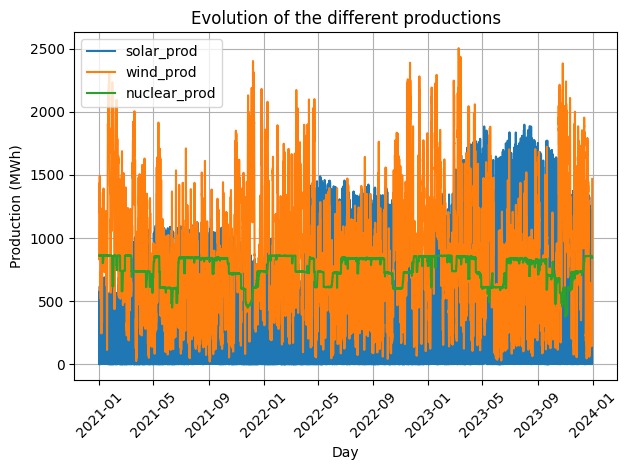

In [ ]:
# Display a plot where for the evolution of electricity generated
for column in combined.columns[:3]:
    if column != 'datetime':  # Exclude datetime column
        plt.plot(combined.index, combined[column], label=column)

plt.xlabel("Day")
plt.ylabel("Production (MWh)")
plt.title("Evolution of the different productions")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

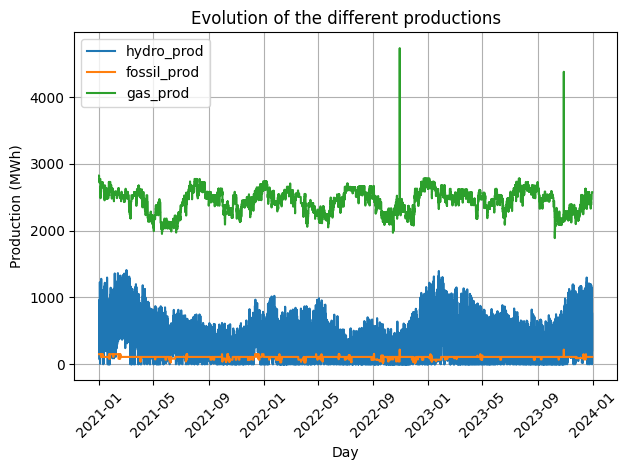

In [ ]:
# Display a plot where for the evolution of electricity generated
for column in combined.columns[3:6]:
    if column != 'datetime':  # Exclude datetime column
        plt.plot(combined.index, combined[column], label=column)

plt.xlabel("Day")
plt.ylabel("Production (MWh)")
plt.title("Evolution of the different productions")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Preprocessing for the price data (Already done in other file):

In [ ]:
# Import the dataset
price_data = pd.read_csv("price_day_ahead.csv", sep=";")
price_data.head()

,id,name,geoid,geoname,value,datetime
0,805,Hourly average price Day Ahead market component,NaN,NaN,66.88,2019-01-01T00:00:00+01:00
1,805,Hourly average price Day Ahead market component,NaN,NaN,66.88,2019-01-01T01:00:00+01:00
2,805,Hourly average price Day Ahead market component,NaN,NaN,66.00,2019-01-01T02:00:00+01:00
3,805,Hourly average price Day Ahead market component,NaN,NaN,63.64,2019-01-01T03:00:00+01:00
4,805,Hourly average price Day Ahead market component,NaN,NaN,58.85,2019-01-01T04:00:00+01:00


In [ ]:
# Import the dataset
test_data = pd.read_csv("spot_price2024.csv", sep=";")
test_data.head()

,id,name,geoid,geoname,value,datetime
0,10211,Precio medio horario final suma de componentes,NaN,NaN,87.14,2023-12-31T22:00:00+01:00
1,10211,Precio medio horario final suma de componentes,NaN,NaN,81.93,2023-12-31T23:00:00+01:00
2,10211,Precio medio horario final suma de componentes,NaN,NaN,78.62,2024-01-01T00:00:00+01:00
3,10211,Precio medio horario final suma de componentes,NaN,NaN,70.65,2024-01-01T01:00:00+01:00
4,10211,Precio medio horario final suma de componentes,NaN,NaN,66.38,2024-01-01T02:00:00+01:00


In [ ]:
# Keep just the important columns, value and datetime
price_data = price_data.iloc[:,[4,5]]
test_data = test_data.iloc[:,[4,5]]

In [ ]:
# Rename the column value
price_data = price_data.rename(columns={'value': 'price'})
test_data = test_data.rename(columns={'value': 'price'})

In [ ]:
# Convert datetime to data type of variable
price_data['datetime'] = pd.to_datetime(price_data['datetime'], utc=True)
test_data['datetime'] = pd.to_datetime(test_data['datetime'], utc=True)

# Set the datetime as the index
price_data.set_index("datetime", inplace=True)
test_data.set_index("datetime", inplace=True)

In [ ]:
# Check for missing values per column
missing = test_data.isna().sum()
columns_with_missing_values = missing[missing>0]
print("Number of columns with missing values (in test):", columns_with_missing_values)
# It does not exist missing data

Number of columns with missing values (in test): Series([], dtype: int64)


In [ ]:
# Check for missing values per column
missing = price_data.isna().sum()
columns_with_missing_values = missing[missing>0]
print("Number of columns with missing values (in price_data):", columns_with_missing_values)
# It does not exist missing data

Number of columns with missing values (in price_data): Series([], dtype: int64)


In [ ]:
# Missing observations (test_data) are:

# Get the index of the DataFrame
index = test_data.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours (test_data):", missing_hours)

Missing hours (test_data): DatetimeIndex([], dtype='datetime64[ns, UTC]', freq='H')


In [ ]:
# One years collected had 366 days, the rest have 365 so we expect to have 24*365*4 + 366*24 = 43824. However, we get 43820.
# Missing observations (price_data) are:

# Get the index of the DataFrame
index = price_data.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours (price_data):", missing_hours)

# If we go to the excel these values are not missing. As they are only 4 observations in a datagrame of ~50.000 observations, we will leave it like that.

Missing hours (price_data): DatetimeIndex(['2020-10-25 01:00:00+00:00', '2021-10-31 01:00:00+00:00',
               '2022-10-30 01:00:00+00:00', '2023-10-29 01:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


# Linear stochastic optimization model formulation:

In [ ]:
# We will create a test data with data for a complete year. June 2023 to June 2024.
to_join23 = price_data.iloc[39046:43818,]
data_train = price_data.iloc[:39046,]

In [ ]:
test_data = test_data.iloc[:4012,]
test__data = pd.concat([to_join23, test_data])

In [ ]:
# Recurrent neural network (RNN) - for creating the sceanrios of the Spot Price

# Feature engineering: create sequences for the RNN
def create_sequences(df, time_steps):
    sequences = []
    output = []
    for i in range(time_steps, len(df)):
        sequences.append(df[i-time_steps:i])
        output.append(df[i])
    return np.array(sequences), np.array(output)

np.random.seed(123)
# Normalize the data
scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(test__data)

# Define the number of time steps (this is a hyperparameter you can tune)
time_steps = 24  # For example, 24-hour sequence for hourly data

# Create sequences for training and test data
X_train, y_train = create_sequences(data_train_scaled, time_steps)
X_test, y_test = create_sequences(data_test_scaled, time_steps)

# Define the RNN model (you can tune the number of units, layers, etc.)
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
rnn_model.add(Dense(1))

# Compile the model with hyperparameters to tune (e.g., learning rate)
optimizer = Adam(learning_rate=0.001)
rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
np.random.seed(123)
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
np.random.seed(123)
predictions_rnn_scaled = rnn_model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_rnn = scaler.inverse_transform(predictions_rnn_scaled)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


976/976 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 7.0866e-04 - val_loss: 4.2748e-04
Epoch 2/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1.2480e-04 - val_loss: 3.5567e-04
Epoch 3/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.1837e-04 - val_loss: 3.4498e-04
Epoch 4/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2128e-04 - val_loss: 3.4202e-04
Epoch 5/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 1.1202e-04 - val_loss: 3.5172e-04
Epoch 6/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 1.2141e-04 - val_loss: 3.7241e-04
Epoch 7/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 1.0900e-04 - val_loss: 3.5672e-04
Epoch 8/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.0824e-04 - val_loss: 3.4630e-04
Epoch 9/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 1.1297e-04 - val_loss: 3.5174e-04
Epoch 10/10
976/976 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.1552e-04 - val_loss: 3.5002e-04
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
# Check that the predictions are in the 2D
print(predictions_rnn.shape)

(8760, 1)


In [ ]:
# Convert into a 1D
predictions_rnn = predictions_rnn.flatten()

In [ ]:
# Incorporate a time series information to the prediction array
predictions_rnn = pd.Series(predictions_rnn, index=test__data.index[time_steps:])

In [ ]:
# 365 days
predictions_rnn

,0
datetime,
2023-06-17 00:00:00+00:00,118.609840
2023-06-17 01:00:00+00:00,118.662399
2023-06-17 02:00:00+00:00,117.556046
2023-06-17 03:00:00+00:00,123.289474
2023-06-17 04:00:00+00:00,126.912964
...,...
2024-06-15 20:00:00+00:00,47.086452
2024-06-15 21:00:00+00:00,56.519337
2024-06-15 22:00:00+00:00,44.596867


In [ ]:
# Replace negative predictions with 0
predictions_rnn[predictions_rnn < 0] = 0

In [ ]:
# Check if there are negative values
predictions_rnn.describe()

,0
count,8760.000000
mean,69.581436
std,41.091595
min,0.000000
25%,32.088210
50%,74.382526
75%,101.178741
max,228.366486


In [ ]:
# Convert the predictions from a (8760,) to (365,24).
# To have scenarios representing a day and columns representing the hours.
predictions_rnn_array = predictions_rnn.values
predictions_rnn_reshaped = predictions_rnn_array.reshape((365, 24))
predictions_rnn_reshaped

array([[118.60984 , 118.6624  , 117.556046, ..., 137.88039 , 130.34671 ,
        119.85239 ],
       [100.21657 , 100.58362 , 100.44514 , ..., 133.23277 , 119.15836 ,
         94.32296 ],
       [ 86.42607 , 102.10053 , 101.70711 , ..., 136.62094 , 125.56078 ,
        112.33612 ],
       ...,
       [ 95.619606, 106.171135, 114.02926 , ..., 105.69004 ,  70.717476,
         83.32922 ],
       [ 86.49791 ,  89.725174,  91.19445 , ...,  42.23319 ,  44.38091 ,
         47.358364],
       [ 50.723595,  50.374218,  51.044167, ...,  44.596867,  43.63997 ,
         47.91663 ]], dtype=float32)

In [ ]:
predictions_rnn_reshaped.shape

(365, 24)

In [ ]:
# Reducion from 365 scnearios to 100 using kmeans clustering
n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(predictions_rnn_reshaped)
# The centroids will be the representative scenarios
reduced_scenarios = kmeans.cluster_centers_
# Calculate the proportion of scenarios that fall into each cluster to assign weights.
labels, counts = np.unique(kmeans.labels_, return_counts=True)
scenario_weights = counts / counts.sum()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print(f"Reduced scenarios shape: {reduced_scenarios.shape}")
print(f"Scenario weights: {scenario_weights}")

Reduced scenarios shape: (100, 24)
Scenario weights: [0.00547945 0.02465753 0.0109589  0.00273973 0.01369863 0.00821918
 0.02465753 0.0109589  0.00821918 0.01917808 0.02739726 0.00547945
 0.00273973 0.02191781 0.0109589  0.02739726 0.02739726 0.00273973
 0.0109589  0.00273973 0.01369863 0.04383562 0.00273973 0.00273973
 0.00821918 0.01643836 0.00547945 0.00273973 0.00273973 0.00821918
 0.0109589  0.00547945 0.00273973 0.00273973 0.00273973 0.00821918
 0.01917808 0.0109589  0.0109589  0.00547945 0.0109589  0.00547945
 0.02191781 0.00547945 0.00547945 0.00273973 0.01917808 0.01917808
 0.00273973 0.00821918 0.00547945 0.00273973 0.00821918 0.00273973
 0.01917808 0.01369863 0.00821918 0.00547945 0.00547945 0.00547945
 0.00547945 0.00273973 0.00821918 0.01369863 0.00547945 0.00273973
 0.00547945 0.0109589  0.00821918 0.03287671 0.00821918 0.00821918
 0.00821918 0.00273973 0.00821918 0.00273973 0.0109589  0.00273973
 0.00273973 0.01643836 0.03287671 0.00273973 0.00273973 0.00273973
 0.002739

In [ ]:
# Download pyomo
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package

In [ ]:
# Stochastic optimization problem

#####################################################      WITH CVAR      #####################################################

from pyomo.environ import *

np.random.seed(123)

model = ConcreteModel()

# Define the subindex (All start at 0 because Python way of indexing):
model.W = RangeSet(0,99) # Nº of scenarios
model.I = RangeSet(0,5) # Types of sources to produce electricity
model.T = RangeSet(0,23) # Nº hours in a day

# Define parameters:
alpha = 0.95
beta = 0 # VER CUAL DE LAS 2 SE HACE EL SENSITIVITY ANALYSIS (SI ESO FIJAR LA OTRA) (Beta=0 deterministic)

# Generate some variables
pi = scenario_weights # Non-Equiprobable scenarios (sum=1 and all>0)
pf = 65 # Price in the forward (FIX BUT MAY DEPEND ON THE SCENARIO)
ps = reduced_scenarios # All > 0

# Define an initial array for the marginal cost
c = np.zeros((len(model.I), len(model.W), len(model.T)))
# Set values for each generation unit
c[0, :, :] = np.random.normal(36.64, 1.832, size=(len(model.W), len(model.T)))  # For coal
c[1, :, :] = np.random.normal(45.44, 2.272, size=(len(model.W), len(model.T)))  # For gas
c[2, :, :] = 0  # For nuclear
c[3, :, :] = 0  # For hydro
c[4, :, :] = 0  # For solar
c[5, :, :] = 0  # For wind

# Define an initial array for the maximum quantity to produce:
Q = np.zeros((len(model.I), len(model.W), len(model.T)))
# Set values for each generation unit
Q[0, :, :] = 219.74  # For coal
Q[1, :, :] = 4731.34  # For gas
Q[2, :, :] = 862.15  # For nuclear
Q[3, :, :] = np.random.normal(328.02, 78.18, size=(len(model.W), len(model.T)))  # For hydro
Q[4, :, :] = np.maximum(0,np.random.normal(384.52, 104.1, size=(len(model.W), len(model.T))))  # For solar
Q[5, :, :] = np.random.normal(823.57, 178.17, size=(len(model.W), len(model.T)))  # For wind

# Variable definition:
model.qfs = Var(domain=NonNegativeReals) # Q sold in forward market
model.qfp = Var(model.I, model.W, model.T, domain=NonNegativeReals) # Q produce by the firm in forward market
model.qsp = Var(model.I, model.W, model.T, domain=NonNegativeReals) # Q produce by the firm in spot market
model.n = Var(domain=Reals) # We allow it to be negative, as the firm may occur in costs
model.s = Var(model.W, domain=NonNegativeReals)

def profit_expression(model, w):
    first_stage = pf * model.qfs  # Revenue in the forward
    second_stage = (sum(ps[w, t] * sum(model.qsp[i, w, t] for i in model.I) for t in model.T) -  # Revenue in the spot
                    sum(c[i, w, t] * (model.qfp[i, w, t] + model.qsp[i, w, t]) for i in model.I for t in model.T) -  # Production costs
                    (sum(ps[w, t] for t in model.T) / len(model.T)) * (model.qfs - sum(model.qfp[i, w, t] for i in model.I for t in model.T))) # Cost of buying at the spot if needed
                    #sum(ps[w, t] * model.qfs / len(model.T) for t in model.T) +  # Cost of buying at the spot if needed
                    #sum(ps[w, t] * model.qfp[i, w, t] for i in model.I for t in model.T))
    return first_stage + second_stage

model.prof = Expression(model.W, rule=profit_expression)

# Define the objective function
def objective_function(model):
    first_stage = pf * model.qfs # Revenue in the forward
    second_stage = sum(pi[w] * (sum(ps[w, t] * sum(model.qsp[i, w, t] for i in model.I) for t in model.T) - # Revenue in the spot
                             sum(c[i, w, t] * (model.qfp[i, w, t] + model.qsp[i, w, t]) for i in model.I for t in model.T) - # Production costs
                             #(sum(ps[w, t] for t in model.T) / len(model.T)) * (model.qfs - sum(model.qfp[i, w, t] for i in model.I for t in model.T))) # Cost of buying at the spot if needed
                            sum(ps[w, t]*model.qfs/ len(model.T) for t in model.T) + sum(ps[w, t]*model.qfp[i, w, t] for i in model.I for t in model.T)) # Cost of buying at the spot if needed
                    for w in model.W)
    cvar = model.n - (1/(1-alpha)) * sum(pi[w] * model.s[w] for w in model.W)
    return (1 - beta) * (first_stage + second_stage) + beta * cvar

model.Obj = Objective(rule=objective_function, sense=maximize)

# Define constraints
def constraint_1(model, w): # The fact that is greater or equal to zero is covered in the variable definition
    return sum(model.qfp[i, w, t] for i in model.I for t in model.T) <= model.qfs
model.Constraint1 = Constraint(model.W, rule=constraint_1)

def constraint_2(model, i, w, t):
    return model.qfp[i, w, t] + model.qsp[i, w, t] <= Q[i, w, t]
model.Constraint2 = Constraint(model.I, model.W, model.T, rule=constraint_2)

# The constraint 3, 4 and 5 ensures qsp (sum for all generators), qfs and qfp is greater or equal to zero. It is already coverd in the variable definition

def constraint_6(model, w):
    return model.n - model.prof[w] <= model.s[w] # For determining s
model.Constraint6 = Constraint(model.W, rule=constraint_6)

# The constraint 7 ensures s is positive and non negative. It is already coverd in the variable definition

# Solve the model
opt = SolverFactory('glpk')
results = opt.solve(model, tee=True)

# Display the results
model.display()

Streaming output truncated to the last 5000 lines.
        (3, 95, 22) :  None :   322.363318614207 : 322.36331861420706
        (3, 95, 23) :  None :    418.51143760735 :  418.5114376073502
         (3, 96, 0) :  None :   324.176160263256 :  324.1761602632557
         (3, 96, 1) :  None :   189.725760946527 : 189.72576094652717
         (3, 96, 2) :  None :   341.155203627658 : 341.15520362765767
         (3, 96, 3) :  None :   436.955877622325 : 436.95587762232503
         (3, 96, 4) :  None :   318.112083825555 :  318.1120838255548
         (3, 96, 5) :  None :   231.881631475348 : 231.88163147534817
         (3, 96, 6) :  None :   301.629595333525 : 301.62959533352506
         (3, 96, 7) :  None :   239.875656718969 : 239.87565671896874
         (3, 96, 8) :  None :   401.875304082643 :  401.8753040826429
         (3, 96, 9) :  None :   238.537289717244 :  238.5372897172444
        (3, 96, 10) :  None :   250.223094923575 : 250.22309492357462
        (3, 96, 11) :  None :   322.842

In [ ]:
# Check solver status
from pyomo.opt import SolverStatus, TerminationCondition

if results.solver.status == SolverStatus.ok and results.solver.termination_condition == TerminationCondition.optimal:
    print("Solution is optimal and feasible.")
else:
    print("Solver Status: ", results.solver.status)
    print("Termination Condition: ", results.solver.termination_condition)

Solution is optimal and feasible.


In [ ]:
# Stochastic optimization problem (Without-risk)
from pyomo.environ import *

np.random.seed(123)

model = ConcreteModel()

# Define the subindex (All start at 0 because Python way of indexing):
model.W = RangeSet(0,99) # Nº of scenarios
model.I = RangeSet(0,5) # Types of sources to produce electricity
model.T = RangeSet(0,23) # Nº hours in a day

# Define parameters:
alpha = 0.95
beta = 0 # VER CUAL DE LAS 2 SE HACE EL SENSITIVITY ANALYSIS (SI ESO FIJAR LA OTRA) (Beta=0 deterministic)

# Generate some variables
pi = scenario_weights # Non-Equiprobable scenarios
pf = 65 # Price in the forward (FIX BUT MAY DEPEND ON THE SCENARIO)
ps = reduced_scenarios

# Define an initial array for the marginal cost
c = np.zeros((len(model.I), len(model.W), len(model.T)))
# Set values for each generation unit
c[0, :, :] = np.random.normal(36.64, 1.832, size=(len(model.W), len(model.T)))  # For coal
c[1, :, :] = np.random.normal(45.44, 2.272, size=(len(model.W), len(model.T)))  # For gas
c[2, :, :] = 0  # For nuclear
c[3, :, :] = 0  # For hydro
c[4, :, :] = 0  # For solar
c[5, :, :] = 0  # For wind

# Define an initial array for the maximum quantity to produce:
Q = np.zeros((len(model.I), len(model.W), len(model.T)))
# Set values for each generation unit
Q[0, :, :] = 219.74  # For coal
Q[1, :, :] = 4731.34  # For gas
Q[2, :, :] = 862.15  # For nuclear
Q[3, :, :] = np.random.normal(328.02, 78.18, size=(len(model.W), len(model.T)))  # For hydro
Q[4, :, :] = np.maximum(0,np.random.normal(384.52, 104.1, size=(len(model.W), len(model.T))))  # For solar
Q[5, :, :] = np.random.normal(823.57, 178.17, size=(len(model.W), len(model.T)))  # For wind

# Variable definition:
model.qfs = Var(domain=NonNegativeReals) # Q sold in forward market
model.qfp = Var(model.I, model.W, model.T, domain=NonNegativeReals) # Q produce by the firm in forward market
model.qsp = Var(model.I, model.W, model.T, domain=NonNegativeReals) # Q produce by the firm in spot market

# Define the objective function
def objective_function(model):
    first_stage = pf * model.qfs # Revenue in the forward
    second_stage = sum(pi[w] * (sum(ps[w, t] * sum(model.qsp[i, w, t] for i in model.I) for t in model.T) - # Revenue in the spot
                             sum(c[i, w, t] * (model.qfp[i, w, t] + model.qsp[i, w, t]) for i in model.I for t in model.T) - # Production costs
                             #(sum(ps[w, t] for t in model.T) / len(model.T)) * (model.qfs - sum(model.qfp[i, w, t] for i in model.I for t in model.T))) # Cost of buying at the spot if needed
                            sum(ps[w, t]*model.qfs/ len(model.T) for t in model.T)  + sum(ps[w, t]*model.qfp[i, w, t] for i in model.I for t in model.T)) # Cost of buying at the spot if needed
                    for w in model.W)
    return first_stage + second_stage

model.Obj = Objective(rule=objective_function, sense=maximize)

# Define constraints
def constraint_1(model, w): # The fact that is greater or equal to zero is covered in the variable definition
    return sum(model.qfp[i, w, t] for i in model.I for t in model.T) <= model.qfs
model.Constraint1 = Constraint(model.W, rule=constraint_1)

def constraint_2(model, i, w, t):
    return model.qfp[i, w, t] + model.qsp[i, w, t] <= Q[i, w, t]
model.Constraint2 = Constraint(model.I, model.W, model.T, rule=constraint_2)

# The constraint 3, 4 and 5 ensures qsp (sum for all generators), qfs and qfp is greater or equal to zero. It is already coverd in the variable definition

# Solve the model
opt = SolverFactory('glpk')
results = opt.solve(model, tee=True)

# Display the results
model.display()

Streaming output truncated to the last 5000 lines.
        (3, 91, 16) :  None : 415.413430295733 :   415.413430295733
        (3, 91, 17) :  None : 327.572298081099 : 327.57229808109923
        (3, 91, 18) :  None : 446.728021469191 : 446.72802146919054
        (3, 91, 19) :  None : 270.672352932918 :  270.6723529329185
        (3, 91, 20) :  None : 191.923278789022 : 191.92327878902194
        (3, 91, 21) :  None : 348.975600469118 : 348.97560046911775
        (3, 91, 22) :  None : 364.059490101276 : 364.05949010127614
        (3, 91, 23) :  None : 480.732188043492 :  480.7321880434918
         (3, 92, 0) :  None : 279.071641926815 :  279.0716419268151
         (3, 92, 1) :  None : 364.061740620408 : 364.06174062040805
         (3, 92, 2) :  None : 411.164436819423 :  411.1644368194225
         (3, 92, 3) :  None : 346.805399653546 :  346.8053996535456
         (3, 92, 4) :  None : 345.507844761911 : 345.50784476191086
         (3, 92, 5) :  None : 222.748003563884 : 222.748003563884

In [ ]:
# Extraction of the important variables
print(beta)
# Extract the optimal value of the objective function
optimal_value = model.Obj()

# Extract decision variables
qfs_value = model.qfs.value
qfp_values = np.zeros((len(model.I), len(model.W), len(model.T)))
qsp_values = np.zeros((len(model.I), len(model.W), len(model.T)))
#n_value = model.n.value
#s_values = np.zeros(len(model.W))

for i in model.I:
    for w in model.W:
        for t in model.T:
            qfp_values[i, w, t] = model.qfp[i, w, t].value
            qsp_values[i, w, t] = model.qsp[i, w, t].value

#for w in model.W:
#    s_values[w] = model.s[w].value

# Calculate profits per scenario
profits_per_scenario = np.zeros(len(model.W))
first_stage = pf * qfs_value


for w in model.W:
    # Revenue in the spot
    revenue_spot = sum(ps[w, t] * sum(qsp_values[i, w, t] for i in model.I) for t in model.T)
    # Production costs
    production_costs = sum(c[i, w, t] * (qfp_values[i, w, t] + qsp_values[i, w, t]) for i in model.I for t in model.T)
    # Cost of buying at the spot if needed
    cost_of_buying_spot = sum(ps[w, t] * qfs_value / len(model.T) for t in model.T) - sum(ps[w, t] * qfp_values[i, w, t] for i in model.I for t in model.T)

    # Calculate second stage profit for scenario w
    second_stage = pi[w] * (revenue_spot - production_costs - cost_of_buying_spot)

    #cvar = model.n - (1/(1-alpha)) * (pi[w] * model.s[w])

    # Use value() to extract the numerical value from the Pyomo expressions
    #profits_per_scenario[w] = (1 - beta) * value(first_stage + second_stage) + beta * value(cvar)
    profits_per_scenario[w] = first_stage + second_stage

0


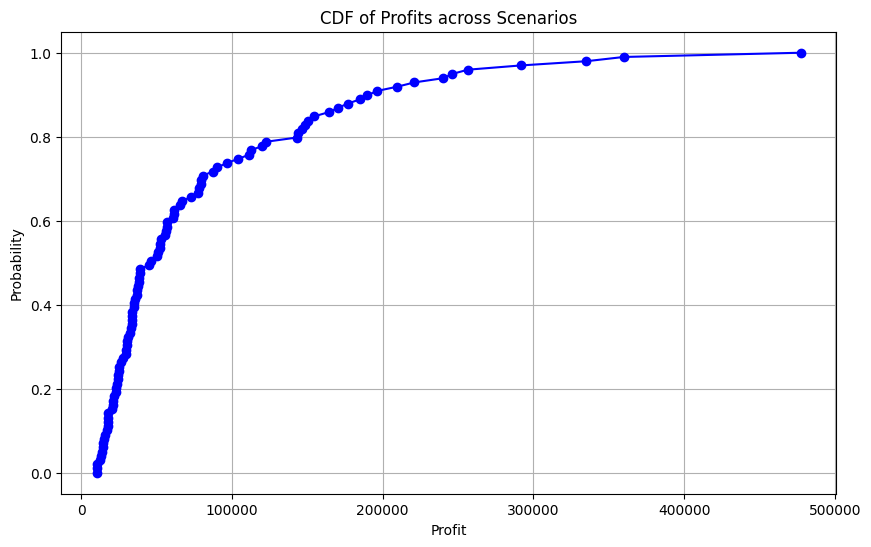

In [ ]:
# CDF plot for profits across scenarios
sorted_profits = np.sort(profits_per_scenario)
cdf = np.arange(len(sorted_profits)) / float(len(sorted_profits) - 1)

plt.figure(figsize=(10, 6))
plt.plot(sorted_profits, cdf, marker='o', linestyle='-', color='b')
plt.title('CDF of Profits across Scenarios')
plt.xlabel('Profit')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

<ipython-input-101-21e5ddb6c59c>:8: RuntimeWarning: invalid value encountered in divide
  proportion_qfp = total_qfp / total_forward


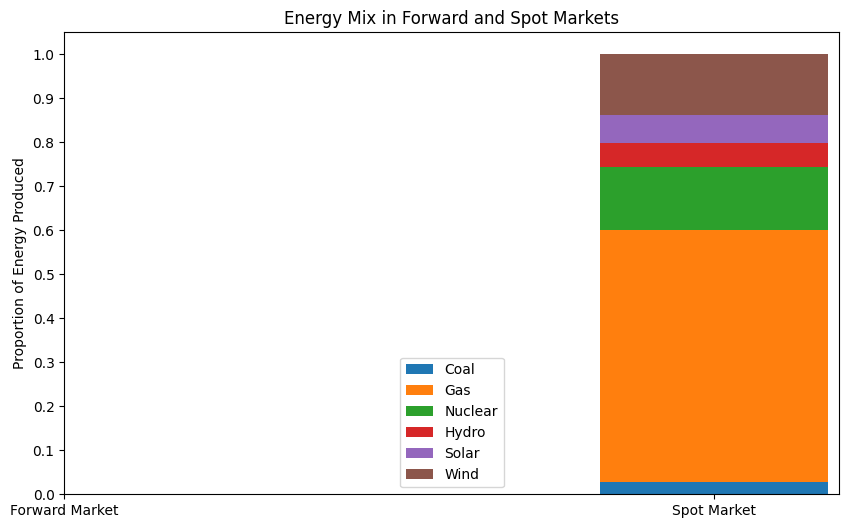

In [ ]:
# Bar graph for energy mix
total_qfp = np.sum(qfp_values, axis=(1, 2))
total_qsp = np.sum(qsp_values, axis=(1, 2))

total_forward = np.sum(total_qfp)
total_spot = np.sum(total_qsp)

proportion_qfp = total_qfp / total_forward
proportion_qsp = total_qsp / total_spot

ind = np.arange(2)
width = 0.35

plt.figure(figsize=(10, 6))

# Define the colors to ensure they are consistent
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

p1 = plt.bar(ind[0], proportion_qfp[0], width, color=colors[0], label='Coal')
p2 = plt.bar(ind[0], proportion_qfp[1], width, bottom=proportion_qfp[0], color=colors[1], label='Gas')
p3 = plt.bar(ind[0], proportion_qfp[2], width, bottom=proportion_qfp[0] + proportion_qfp[1], color=colors[2], label='Nuclear')
p4 = plt.bar(ind[0], proportion_qfp[3], width, bottom=proportion_qfp[0] + proportion_qfp[1] + proportion_qfp[2], color=colors[3], label='Hydro')
p5 = plt.bar(ind[0], proportion_qfp[4], width, bottom=proportion_qfp[0] + proportion_qfp[1] + proportion_qfp[2] + proportion_qfp[3], color=colors[4], label='Solar')
p6 = plt.bar(ind[0], proportion_qfp[5], width, bottom=proportion_qfp[0] + proportion_qfp[1] + proportion_qfp[2] + proportion_qfp[3] + proportion_qfp[4], color=colors[5], label='Wind')

p1 = plt.bar(ind[1], proportion_qsp[0], width, color=colors[0])
p2 = plt.bar(ind[1], proportion_qsp[1], width, bottom=proportion_qsp[0], color=colors[1])
p3 = plt.bar(ind[1], proportion_qsp[2], width, bottom=proportion_qsp[0] + proportion_qsp[1], color=colors[2])
p4 = plt.bar(ind[1], proportion_qsp[3], width, bottom=proportion_qsp[0] + proportion_qsp[1] + proportion_qsp[2], color=colors[3])
p5 = plt.bar(ind[1], proportion_qsp[4], width, bottom=proportion_qsp[0] + proportion_qsp[1] + proportion_qsp[2] + proportion_qsp[3], color=colors[4])
p6 = plt.bar(ind[1], proportion_qsp[5], width, bottom=proportion_qsp[0] + proportion_qsp[1] + proportion_qsp[2] + proportion_qsp[3] + proportion_qsp[4], color=colors[5])

plt.ylabel('Proportion of Energy Produced')
plt.title('Energy Mix in Forward and Spot Markets')
plt.xticks(ind, ('Forward Market', 'Spot Market'))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.show()

In [ ]:
# Summarize key metrics
expected_profit = np.mean(profits_per_scenario)
expected_forward_revenue = first_stage
expected_spot_revenue = np.mean(sum(pi[w] * sum(ps[w, t] * sum(qsp_values[i, w, t] for i in model.I) for t in model.T) for w in model.W))
expected_production_cost = np.mean(sum(pi[w] * sum(c[i, w, t] * (qfp_values[i, w, t] + qsp_values[i, w, t]) for i in model.I for t in model.T) for w in model.W))
expected_buying_cost = np.mean(sum(pi[w] * sum(ps[w, t] * qfs_value / len(model.T) for t in model.T) - sum(ps[w, t] * qfp_values[i, w, t] for i in model.I for t in model.T) for w in model.W))
expected_spot_price = np.mean(ps)
expected_qfp = np.mean(qfp_values, axis=(1, 2))
expected_qsp = np.mean(qsp_values, axis=(1, 2))

# Print the summary
print(f"Expected Profit: {expected_profit:.2f}")
print(f"Expected Forward Market Revenue: {expected_forward_revenue:.2f}")
print(f"Expected Spot Market Revenue: {expected_spot_revenue:.2f}")
print(f"Expected Production Cost: {expected_production_cost:.2f}")
print(f"Expected Cost of Buying energy: {expected_buying_cost:.2f}")
print(f"Expected Spot Price: {expected_spot_price:.2f}")
print("Expected Production in Forward Market (qfp) per Source:")
for i in range(len(model.I)):
    print(f"  Source {i}: {expected_qfp[i]:.2f}")
print("Expected Production in Spot Market (qsp) per Source:")
for i in range(len(model.I)):
    print(f"  Source {i}: {expected_qsp[i]:.2f}")

Expected Profit: 80673.58
Expected Forward Market Revenue: 0.00
Expected Spot Market Revenue: 11796219.52
Expected Production Cost: 3728861.50
Expected Cost of Buying energy: 0.00
Expected Spot Price: 74.37
Expected Production in Forward Market (qfp) per Source:
  Source 0: 0.00
  Source 1: 0.00
  Source 2: 0.00
  Source 3: 0.00
  Source 4: 0.00
  Source 5: 0.00
Expected Production in Spot Market (qsp) per Source:
  Source 0: 172.31
  Source 1: 3447.96
  Source 2: 859.99
  Source 3: 327.51
  Source 4: 383.24
  Source 5: 827.68


# Sensitivity analyis on beta:

Let´s inspect how profits change for different risk attitudes of the producer by modifying the value of beta.

In [ ]:
from pyomo.environ import *

np.random.seed(123)

# Define model function

def create_model(beta):
    np.random.seed(123)
    model1 = ConcreteModel()

    # Define the subindex
    model1.W = RangeSet(0, 99)  # Nº of scenarios
    model1.I = RangeSet(0, 5)   # Types of sources to produce electricity
    model1.T = RangeSet(0, 23)  # Nº hours in a day

    # Define parameters
    alpha = 0.95

    # Generate some variables
    pi = scenario_weights #np.full(len(model.W), 1/300) # Equiprobable scenarios
    pf = 65 # Price in the forward (FIX BUT MAY DEPEND ON THE SCENARIO)
    ps = reduced_scenarios

    # Define an initial array for the marginal cost
    c = np.zeros((len(model1.I), len(model1.W), len(model1.T)))
    # Set values for each generation unit
    c[0, :, :] = np.random.normal(36.64, 1.832, size=(len(model1.W), len(model1.T)))  # For coal
    c[1, :, :] = np.random.normal(45.44, 2.272, size=(len(model1.W), len(model1.T)))  # For gas
    c[2, :, :] = 0  # For nuclear
    c[3, :, :] = 0  # For hydro
    c[4, :, :] = 0  # For solar
    c[5, :, :] = 0  # For wind

    # Define an initial array for the maximum quantity to produce:
    Q = np.zeros((len(model1.I), len(model1.W), len(model1.T)))
    # Set values for each generation unit
    Q[0, :, :] = 219.74  # For coal
    Q[1, :, :] = 4731.34  # For gas
    Q[2, :, :] = 862.15  # For nuclear
    Q[3, :, :] = np.random.normal(328.02, 78.18, size=(len(model1.W), len(model1.T)))  # For hydro
    Q[4, :, :] = np.maximum(0,np.random.normal(384.52, 104.1, size=(len(model1.W), len(model1.T))))  # For solar
    Q[5, :, :] = np.random.normal(823.57, 178.17, size=(len(model1.W), len(model1.T)))  # For wind

    # Variable definition
    model1.qfs = Var(domain=NonNegativeReals)  # Q sold in forward market
    model1.qfp = Var(model1.I, model1.W, model1.T, domain=NonNegativeReals)  # Q produced by the firm in forward market
    model1.qsp = Var(model1.I, model1.W, model1.T, domain=NonNegativeReals)  # Q produced by the firm in spot market
    model1.n = Var(domain=Reals)  # We allow it to be negative, as the firm may occur in costs
    model1.s = Var(model1.W, domain=NonNegativeReals)
    # Define the profit expression for each scenario
    def profit_expression(model1, w):
        first_stage = pf * model1.qfs  # Revenue in the forward
        second_stage = (sum(ps[w, t] * sum(model1.qsp[i, w, t] for i in model1.I) for t in model1.T) -  # Revenue in the spot
                        sum(c[i, w, t] * (model1.qfp[i, w, t] + model1.qsp[i, w, t]) for i in model1.I for t in model1.T) -  # Production costs
                        #(sum(ps[w, t] for t in model1.T) / len(model1.T)) * (model1.qfs - sum(model1.qfp[i, w, t] for i in model1.I for t in model1.T))) # Cost of buying at the spot if needed
                        sum(ps[w, t] * model1.qfs / len(model1.T) for t in model1.T) +  # Cost of buying at the spot if needed
                        sum(ps[w, t] * model1.qfp[i, w, t] for i in model1.I for t in model1.T))
        return first_stage + second_stage
    model1.prof = Expression(model1.W, rule=profit_expression)

    # Define the objective function
    def objective_function(model1):
        first_stage = pf * model1.qfs # Revenue in the forward
        second_stage = sum(pi[w] * (sum(ps[w, t] * sum(model1.qsp[i, w, t] for i in model1.I) for t in model1.T) - # Revenue in the spot
                                sum(c[i, w, t] * (model1.qfp[i, w, t] + model1.qsp[i, w, t]) for i in model1.I for t in model1.T) - # Production costs
                                #(sum(ps[w, t] for t in model1.T) / len(model1.T)) * (model1.qfs - sum(model1.qfp[i, w, t] for i in model1.I for t in model1.T))) # Cost of buying at the spot if needed
                                sum(ps[w, t]*model1.qfs/ len(model1.T) for t in model1.T)  + sum(ps[w, t]*model1.qfp[i, w, t] for i in model1.I for t in model1.T)) # Cost of buying at the spot if needed
                        for w in model1.W)
        cvar = model1.n - (1/(1-alpha)) * sum(pi[w] * model1.s[w] for w in model1.W)
        return (1 - beta) * (first_stage + second_stage) + beta * cvar

    model1.Obj = Objective(rule=objective_function, sense=maximize)

    # Define constraints
    def constraint_1(model1, w): # The fact that is greater or equal to zero is covered in the variable definition
        return sum(model1.qfp[i, w, t] for i in model1.I for t in model1.T) <= model1.qfs
    model1.Constraint1 = Constraint(model1.W, rule=constraint_1)

    def constraint_2(model1, i, w, t):
        return model1.qfp[i, w, t] + model1.qsp[i, w, t] <= Q[i, w, t]
    model1.Constraint2 = Constraint(model1.I, model1.W, model1.T, rule=constraint_2)

    # The constraint 3, 4 and 5 ensures qsp (sum for all generators) and qfs is greater or equal to zero. It is already coverd in the variable definition

    def constraint_6(model1, w):
        return model1.n - model1.prof[w] <= model1.s[w] # For determining s
    model1.Constraint6 = Constraint(model1.W, rule=constraint_6)

    return model1

In [ ]:
# Run sensitivity analysis for beta
betas = np.linspace(0, 1, 5)
results = []

for beta in betas:
    model1 = create_model(beta)
    opt = SolverFactory('glpk')
    opt.solve(model1, tee=False)

    # Extract the optimal value of the objective function
    optimal_value = model1.Obj()

    pi = scenario_weights #np.full(len(model.W), 1/300) # Equiprobable scenarios
    pf = 65 # Price in the forward (FIX BUT MAY DEPEND ON THE SCENARIO)
    ps = reduced_scenarios

    # Define an initial array for the marginal cost
    c = np.zeros((len(model1.I), len(model1.W), len(model1.T)))
    # Set values for each generation unit
    c[0, :, :] = np.random.normal(36.64, 1.832, size=(len(model1.W), len(model1.T)))  # For coal
    c[1, :, :] = np.random.normal(45.44, 2.272, size=(len(model1.W), len(model1.T)))  # For gas
    c[2, :, :] = 0  # For nuclear
    c[3, :, :] = 0  # For hydro
    c[4, :, :] = 0  # For solar
    c[5, :, :] = 0  # For wind

    # Extract decision variables
    qfs_value = model1.qfs.value
    qfp_values = np.zeros((len(model1.I), len(model1.W), len(model1.T)))
    qsp_values = np.zeros((len(model1.I), len(model1.W), len(model1.T)))
    n_value = model1.n.value
    s_values = np.zeros(len(model1.W))

    for i in model1.I:
        for w in model1.W:
            for t in model1.T:
                qfp_values[i, w, t] = model1.qfp[i, w, t].value
                qsp_values[i, w, t] = model1.qsp[i, w, t].value

    for w in model1.W:
        s_values[w] = model1.s[w].value

    # Calculate profits per scenario
    profits_per_scenario = np.zeros(len(model1.W))

    first_stage = pf * qfs_value

    for w in model1.W:
      # Revenue in the spot
      revenue_spot = sum(ps[w, t] * sum(qsp_values[i, w, t] for i in model1.I) for t in model1.T)
      # Production costs
      production_costs = sum(c[i, w, t] * (qfp_values[i, w, t] + qsp_values[i, w, t]) for i in model1.I for t in model1.T)
      # Cost of buying at the spot if needed
      cost_of_buying_spot = sum(ps[w, t] * qfs_value / len(model1.T) for t in model1.T) - sum(ps[w, t] * qfp_values[i, w, t] for i in model1.I for t in model1.T)
      #cost_of_buying_spot = (sum(ps[w, t] for t in model1.T) / len(model1.T)) * (model1.qfs - sum(model1.qfp[i, w, t] for i in model1.I for t in model1.T))

      # Calculate second stage profit for scenario w
      second_stage = pi[w] * (revenue_spot - production_costs - cost_of_buying_spot)

      #cvar = model1.n - (1/(1-alpha)) * (pi[w] * model1.s[w])

      # Use value() to extract the numerical value from the Pyomo expressions
      #profits_per_scenario[w] = (1 - beta) * value(first_stage + second_stage) + beta * value(cvar)
      #profits_per_scenario[w] = value(first_stage + second_stage)
      profits_per_scenario[w] = first_stage + second_stage

    expected_profit = np.mean(profits_per_scenario)
    expected_forward_revenue = first_stage
    expected_spot_revenue = np.mean(sum(pi[w] * sum(ps[w, t] * sum(qsp_values[i, w, t] for i in model1.I) for t in model1.T) for w in model1.W))
    expected_production_cost = np.mean(sum(pi[w] * sum(c[i, w, t] * (qfp_values[i, w, t] + qsp_values[i, w, t]) for i in model1.I for t in model1.T) for w in model1.W))
    expected_buying_cost = np.mean(sum(pi[w] * sum(ps[w, t] * qfs_value / len(model1.T) for t in model1.T) - sum(ps[w, t] * qfp_values[i, w, t] for i in model1.I for t in model1.T) for w in model1.W))
    #expected_buying_cost = np.mean([value(pi[w] * ((sum(ps[w, t] for t in model1.T) / len(model1.T)) * (model1.qfs - sum(model1.qfp[i, w, t] for i in model1.I for t in model1.T)))) for w in model1.W])
    expected_spot_price = np.mean(ps)
    expected_qfp = np.mean(qfp_values, axis=(1, 2))
    expected_qsp = np.mean(qsp_values, axis=(1, 2))

    results.append({
        'beta': beta,
        'expected_profit': expected_profit,
        'expected_forward_revenue': expected_forward_revenue,
        'expected_spot_revenue': expected_spot_revenue,
        'expected_production_cost': expected_production_cost,
        'expected_buying_cost': expected_buying_cost,
        #'CVaR': cvar,
        'expected_spot_price': expected_spot_price,
        'expected_qfp': expected_qfp,
        'expected_qsp': expected_qsp
    })

# Print the summary for each beta
for result in results:
    print(f"Beta: {result['beta']}")
    print(f"Expected Profit: {result['expected_profit']:.2f}")
    print(f"Expected Forward Market Revenue: {result['expected_forward_revenue']:.2f}")
    print(f"Expected Spot Market Revenue: {result['expected_spot_revenue']:.2f}")
    print(f"Expected Production Cost: {result['expected_production_cost']:.2f}")
    print(f"Expected Cost of Buying energy: {result['expected_buying_cost']:.2f}")
    #print(f"Expected part of CVaR: {result['CVaR']:.2f}")
    print(f"Expected Spot Price: {result['expected_spot_price']:.2f}")
    print("Expected Production in Forward Market (qfp) per Source:")
    for i in range(len(model1.I)):
        print(f"  Source {i}: {result['expected_qfp'][i]:.2f}")
    print("Expected Production in Spot Market (qsp) per Source:")
    for i in range(len(model1.I)):
        print(f"  Source {i}: {result['expected_qsp'][i]:.2f}")
    print()

Beta: 0.0
Expected Profit: 80647.90
Expected Forward Market Revenue: 0.00
Expected Spot Market Revenue: 11796219.52
Expected Production Cost: 3731429.67
Expected Cost of Buying energy: 0.00
Expected Spot Price: 74.37
Expected Production in Forward Market (qfp) per Source:
  Source 0: 0.00
  Source 1: 0.00
  Source 2: 0.00
  Source 3: 0.00
  Source 4: 0.00
  Source 5: 0.00
Expected Production in Spot Market (qsp) per Source:
  Source 0: 172.31
  Source 1: 3447.96
  Source 2: 859.99
  Source 3: 327.51
  Source 4: 383.24
  Source 5: 827.68

Beta: 0.25
Expected Profit: 7561113.74
Expected Forward Market Revenue: 7563482.55
Expected Spot Market Revenue: 10067128.99
Expected Production Cost: 3731429.67
Expected Cost of Buying energy: -189778558.02
Expected Spot Price: 74.37
Expected Production in Forward Market (qfp) per Source:
  Source 0: 29.21
  Source 1: 526.36
  Source 2: 134.35
  Source 3: 52.40
  Source 4: 64.32
  Source 5: 141.51
Expected Production in Spot Market (qsp) per Source:
 

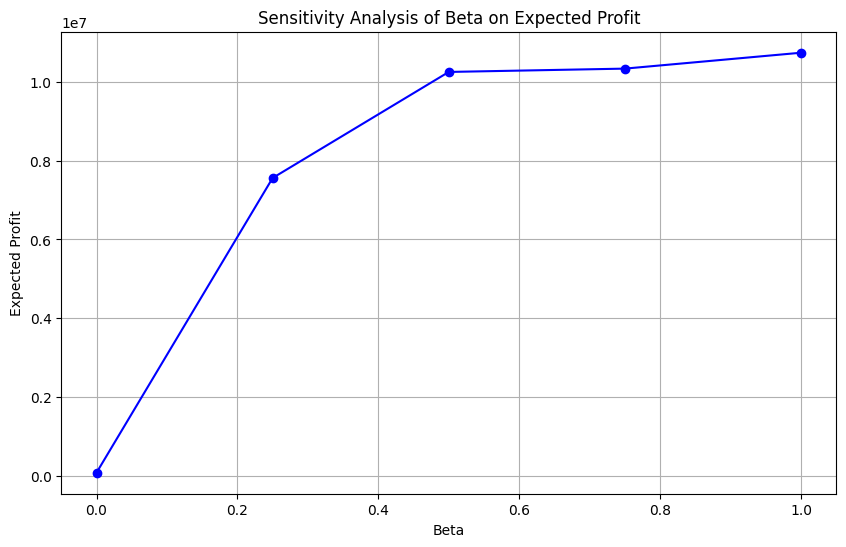

In [ ]:
# Extract beta and expected_profit values from the results
betas = [result['beta'] for result in results]
expected_profits = [result['expected_profit'] for result in results]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(betas, expected_profits, marker='o', linestyle='-', color='b')

# Label the axes
plt.ylabel('Expected Profit')
plt.xlabel('Beta')

# Add a title
plt.title('Sensitivity Analysis of Beta on Expected Profit')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

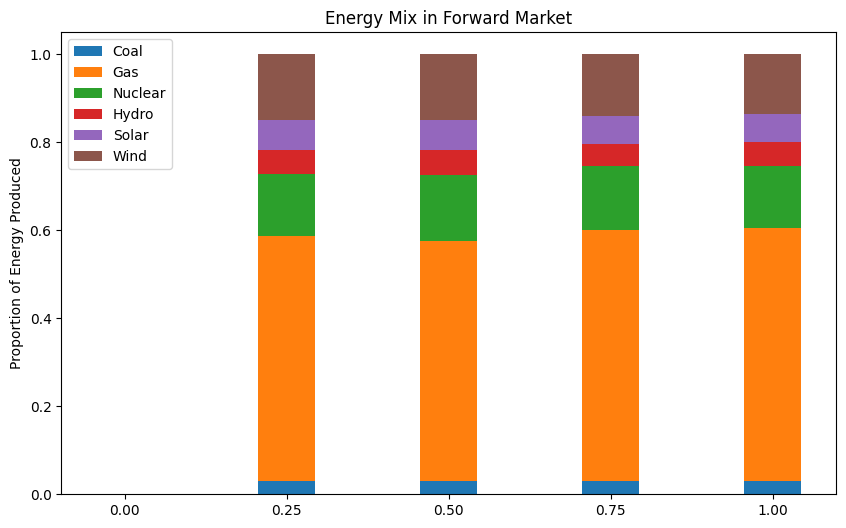

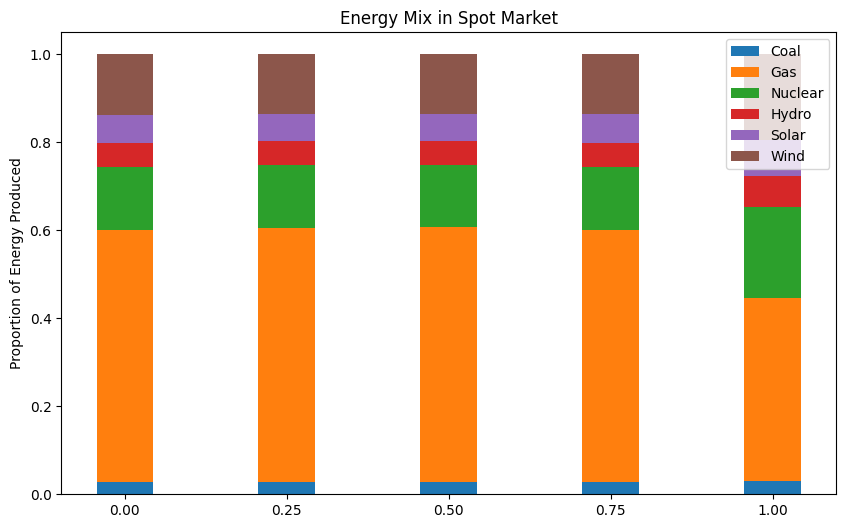

In [ ]:
# Convert lists of arrays into NumPy arrays
proportions_qfp = np.array([result['expected_qfp'] for result in results])
proportions_qsp = np.array([result['expected_qsp'] for result in results])

# Normalize each row to sum to 1, but avoid division by zero
proportions_qfp = np.divide(proportions_qfp, proportions_qfp.sum(axis=1, keepdims=True), where=proportions_qfp.sum(axis=1, keepdims=True) != 0)
proportions_qsp = np.divide(proportions_qsp, proportions_qsp.sum(axis=1, keepdims=True), where=proportions_qsp.sum(axis=1, keepdims=True) != 0)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
energy_sources = ['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Wind']

# Forward market plot
plt.figure(figsize=(10, 6))
ind = np.arange(len(betas))
width = 0.35

for i in range(proportions_qfp.shape[1]):
    bottom = np.zeros(len(betas))
    if i > 0:
        bottom = np.sum(proportions_qfp[:, :i], axis=1)
    plt.bar(ind, proportions_qfp[:, i], width, bottom=bottom, color=colors[i], label=energy_sources[i])

plt.ylabel('Proportion of Energy Produced')
plt.title('Energy Mix in Forward Market')
plt.xticks(ind, [f'{beta:.2f}' for beta in betas])
plt.legend()

# Spot market plot
plt.figure(figsize=(10, 6))
for i in range(proportions_qsp.shape[1]):
    bottom = np.zeros(len(betas))
    if i > 0:
        bottom = np.sum(proportions_qsp[:, :i], axis=1)
    plt.bar(ind, proportions_qsp[:, i], width, bottom=bottom, color=colors[i], label=energy_sources[i])

plt.ylabel('Proportion of Energy Produced')
plt.title('Energy Mix in Spot Market')
plt.xticks(ind, [f'{beta:.2f}' for beta in betas])
plt.legend()

plt.show()


# Parametric study of forward price:

Up to the moment, we were assuming fix forward price, using the value for the electricity in 2025. However, we may be interested in seeing how profits change and specially how the producer decision on the portfolio of sales between spot and forward market change.

In [ ]:
from pyomo.environ import *

np.random.seed(123)

# Define model function
def create_model2(pf):
    model2 = ConcreteModel()

    # Define the subindex
    model2.W = RangeSet(0, 99)  # Nº of scenarios
    model2.I = RangeSet(0, 5)   # Types of sources to produce electricity
    model2.T = RangeSet(0, 23)  # Nº hours in a day

    # Define parameters
    alpha = 0.95
    beta = 1  # Fixed beta for this analysis   MAY BE CHANGED

    # Generate some variables
    pi = scenario_weights #np.full(len(model.W), 1/300) # Equiprobable scenarios
    ps = reduced_scenarios

    # Define an initial array for the marginal cost
    c = np.zeros((len(model2.I), len(model2.W), len(model2.T)))
    # Set values for each generation unit
    c[0, :, :] = np.random.normal(36.64, 1.832, size=(len(model2.W), len(model2.T)))  # For coal
    c[1, :, :] = np.random.normal(45.44, 2.272, size=(len(model2.W), len(model2.T)))  # For gas
    c[2, :, :] = 0  # For nuclear
    c[3, :, :] = 0  # For hydro
    c[4, :, :] = 0  # For solar
    c[5, :, :] = 0  # For wind

    # Define an initial array for the maximum quantity to produce:
    Q = np.zeros((len(model2.I), len(model2.W), len(model2.T)))
    # Set values for each generation unit
    Q[0, :, :] = 219.74  # For coal
    Q[1, :, :] = 4731.34  # For gas
    Q[2, :, :] = 862.15  # For nuclear
    Q[3, :, :] = np.random.normal(328.02, 78.18, size=(len(model2.W), len(model2.T)))  # For hydro
    Q[4, :, :] = np.maximum(0,np.random.normal(384.52, 104.1, size=(len(model2.W), len(model2.T))))  # For solar
    Q[5, :, :] = np.random.normal(823.57, 178.17, size=(len(model2.W), len(model2.T)))  # For wind

    # Variable definition
    model2.qfs = Var(domain=NonNegativeReals)  # Q sold in forward market
    model2.qfp = Var(model2.I, model2.W, model2.T, domain=NonNegativeReals)  # Q produced by the firm in forward market
    model2.qsp = Var(model2.I, model2.W, model2.T, domain=NonNegativeReals)  # Q produced by the firm in spot market
    model2.n = Var(domain=Reals)  # We allow it to be negative, as the firm may occur in costs
    model2.s = Var(model2.W, domain=NonNegativeReals)
    def profit_expression(model2, w):
        first_stage = pf * model2.qfs  # Revenue in the forward
        second_stage = (sum(ps[w, t] * sum(model2.qsp[i, w, t] for i in model2.I) for t in model2.T) -  # Revenue in the spot
                        sum(c[i, w, t] * (model2.qfp[i, w, t] + model2.qsp[i, w, t]) for i in model2.I for t in model2.T) -  # Production costs
                        #(sum(ps[w, t] for t in model1.T) / len(model1.T)) * (model1.qfs - sum(model1.qfp[i, w, t] for i in model1.I for t in model1.T))) # Cost of buying at the spot if needed
                        sum(ps[w, t] * model2.qfs / len(model2.T) for t in model2.T) +  # Cost of buying at the spot if needed
                        sum(ps[w, t] * model2.qfp[i, w, t] for i in model2.I for t in model2.T))
        return first_stage + second_stage
    model2.prof = Expression(model2.W, rule=profit_expression)

    # Define the objective function
    def objective_function(model2):
        first_stage = pf * model2.qfs # Revenue in the forward
        second_stage = sum(pi[w] * (sum(ps[w, t] * sum(model2.qsp[i, w, t] for i in model2.I) for t in model2.T) - # Revenue in the spot
                                sum(c[i, w, t] * (model2.qfp[i, w, t] + model2.qsp[i, w, t]) for i in model2.I for t in model2.T) - # Production costs
                                #(sum(ps[w, t] for t in model2.T) / len(model2.T)) * (model2.qfs - sum(model2.qfp[i, w, t] for i in model2.I for t in model2.T))) # Cost of buying at the spot if needed
                                sum(ps[w, t]*model2.qfs/ len(model2.T) for t in model2.T)  + sum(ps[w, t]*model2.qfp[i, w, t] for i in model2.I for t in model2.T))
                        for w in model2.W)
        cvar = model2.n - (1/(1-alpha)) * sum(pi[w] * model2.s[w] for w in model2.W)
        return (1 - beta) * (first_stage + second_stage) + beta * cvar

    model2.Obj = Objective(rule=objective_function, sense=maximize)

    # Define constraints
    def constraint_1(model2, w): # The fact that is greater or equal to zero is covered in the variable definition
        return sum(model2.qfp[i, w, t] for i in model2.I for t in model2.T) <= model2.qfs
    model2.Constraint1 = Constraint(model2.W, rule=constraint_1)

    def constraint_2(model2, i, w, t):
        return model2.qfp[i, w, t] + model2.qsp[i, w, t] <= Q[i, w, t]
    model2.Constraint2 = Constraint(model2.I, model2.W, model2.T, rule=constraint_2)

    # The constraint 3, 4 and 5 ensures qsp (sum for all generators) and qfs is greater or equal to zero. It is already coverd in the variable definition

    def constraint_6(model2, w):
        return model2.n - model2.prof[w] <= model2.s[w] # For determining s
    model2.Constraint6 = Constraint(model2.W, rule=constraint_6)

    return model2

In [ ]:
ps.shape

(100, 24)

In [ ]:
# Run sensitivity analysis for forward price
pf = np.linspace(50, 80, 5)
np.random.seed(123)
results = []

for price in pf:
    model2 = create_model2(price)
    opt = SolverFactory('glpk')
    opt.solve(model2, tee=False)

    # Extract the optimal value of the objective function
    optimal_value = model2.Obj()

    pi = scenario_weights #np.full(len(model.W), 1/300) # Equiprobable scenarios
    ps = reduced_scenarios


    # Define an initial array for the marginal cost
    c = np.zeros((len(model2.I), len(model2.W), len(model2.T)))
    # Set values for each generation unit
    c[0, :, :] = np.random.normal(36.64, 1.832, size=(len(model2.W), len(model2.T)))  # For coal
    c[1, :, :] = np.random.normal(45.44, 2.272, size=(len(model2.W), len(model2.T)))  # For gas
    c[2, :, :] = 0  # For nuclear
    c[3, :, :] = 0  # For hydro
    c[4, :, :] = 0  # For solar
    c[5, :, :] = 0  # For wind

    # Extract decision variables
    qfs_value = model2.qfs.value
    qfp_values = np.zeros((len(model2.I), len(model2.W), len(model2.T)))
    qsp_values = np.zeros((len(model2.I), len(model2.W), len(model2.T)))
    n_value = model2.n.value
    s_values = np.zeros(len(model2.W))

    for i in model2.I:
        for w in model2.W:
            for t in model2.T:
                qfp_values[i, w, t] = model2.qfp[i, w, t].value
                qsp_values[i, w, t] = model2.qsp[i, w, t].value

    for w in model2.W:
        s_values[w] = model2.s[w].value

    # Calculate profits per scenario
    profits_per_scenario = np.zeros(len(model2.W))

    first_stage = price * qfs_value

    for w in model2.W:
      # Revenue in the spot
      revenue_spot = sum(ps[w, t] * sum(qsp_values[i, w, t] for i in model2.I) for t in model2.T)
      # Production costs
      production_costs = sum(c[i, w, t] * (qfp_values[i, w, t] + qsp_values[i, w, t]) for i in model2.I for t in model2.T)
      # Cost of buying at the spot if needed
      cost_of_buying_spot = sum(ps[w, t] * qfs_value / len(model2.T) for t in model2.T) - sum(ps[w, t] * qfp_values[i, w, t] for i in model2.I for t in model2.T)
      #cost_of_buying_spot = (sum(ps[w, t] for t in model1.T) / len(model1.T)) * (model1.qfs - sum(model1.qfp[i, w, t] for i in model1.I for t in model1.T))

      # Calculate second stage profit for scenario w
      second_stage = pi[w] * (revenue_spot - production_costs - cost_of_buying_spot)

      #cvar = model1.n - (1/(1-alpha)) * (pi[w] * model1.s[w])

      # Use value() to extract the numerical value from the Pyomo expressions
      #profits_per_scenario[w] = (1 - beta) * value(first_stage + second_stage) + beta * value(cvar)
      #profits_per_scenario[w] = value(first_stage + second_stage)
      profits_per_scenario[w] = first_stage + second_stage

    expected_profit = np.mean(profits_per_scenario)
    expected_forward_revenue = first_stage
    expected_spot_revenue = np.mean(sum(pi[w] * sum(ps[w, t] * sum(qsp_values[i, w, t] for i in model2.I) for t in model2.T) for w in model2.W))
    expected_production_cost = np.mean(sum(pi[w] * sum(c[i, w, t] * (qfp_values[i, w, t] + qsp_values[i, w, t]) for i in model2.I for t in model2.T) for w in model2.W))
    expected_buying_cost = np.mean(sum(pi[w] * sum(ps[w, t] * qfs_value / len(model2.T) for t in model2.T) - sum(ps[w, t] * qfp_values[i, w, t] for i in model2.I for t in model2.T) for w in model2.W))
    expected_spot_price = np.mean(ps)
    expected_qfp = np.mean(qfp_values, axis=(1, 2))
    expected_qsp = np.mean(qsp_values, axis=(1, 2))

    results.append({
        'forward_price': price,
        'expected_profit': expected_profit,
        'expected_forward_revenue': expected_forward_revenue,
        'expected_spot_revenue': expected_spot_revenue,
        'expected_production_cost': expected_production_cost,
        'expected_buying_cost': expected_buying_cost,
        #'CVaR': cvar,
        'expected_spot_price': expected_spot_price,
        'expected_qfp': expected_qfp,
        'expected_qsp': expected_qsp
    })

# Print the summary for each beta
for result in results:
    print(f"Forward Price: {result['forward_price']}")
    print(f"Expected Profit: {result['expected_profit']:.2f}")
    print(f"Expected Forward Market Revenue: {result['expected_forward_revenue']:.2f}")
    print(f"Expected Spot Market Revenue: {result['expected_spot_revenue']:.2f}")
    print(f"Expected Production Cost: {result['expected_production_cost']:.2f}")
    print(f"Expected Cost of Buying energy: {result['expected_buying_cost']:.2f}")
    #print(f"Expected part of CVaR: {result['CVaR']:.2f}")
    print(f"Expected Spot Price: {result['expected_spot_price']:.2f}")
    print("Expected Production in Forward Market (qfp) per Source:")
    for i in range(len(model2.I)):
        print(f"  Source {i}: {result['expected_qfp'][i]:.2f}")
    print("Expected Production in Spot Market (qsp) per Source:")
    for i in range(len(model2.I)):
        print(f"  Source {i}: {result['expected_qsp'][i]:.2f}")
    print()

TypeError: 'numpy.float64' object is not iterable

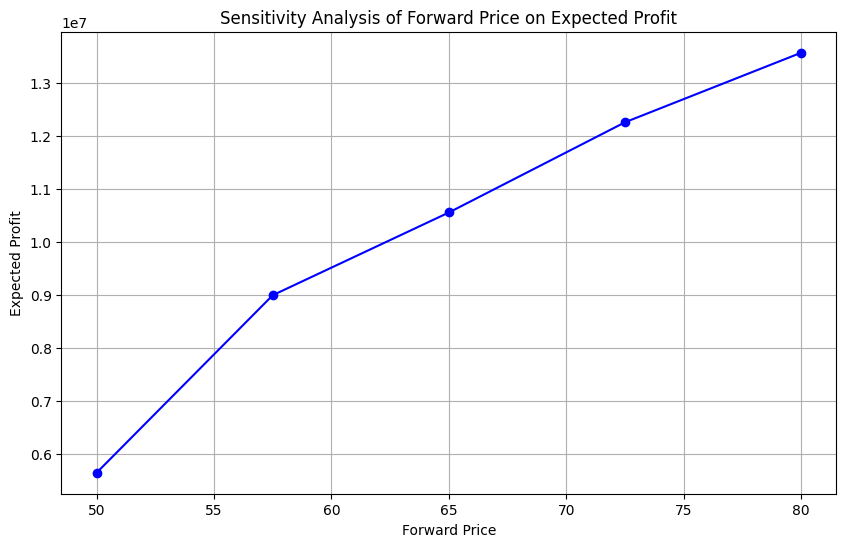

In [ ]:
# Extract beta and expected_profit values from the results
forward = [result['forward_price'] for result in results]
expected_profits = [result['expected_profit'] for result in results]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(forward, expected_profits, marker='o', linestyle='-', color='b')

# Label the axes
plt.ylabel('Expected Profit')
plt.xlabel('Forward Price')

# Add a title
plt.title('Sensitivity Analysis of Forward Price on Expected Profit')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

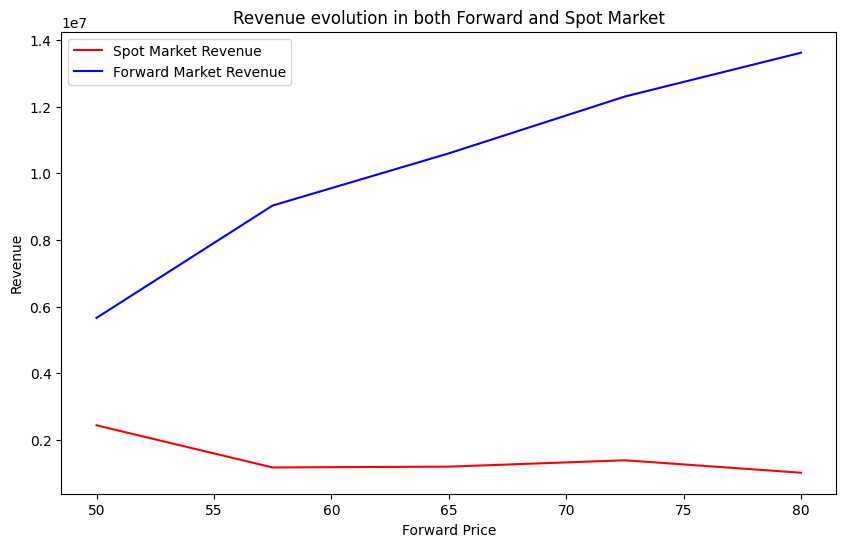

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'results' is a list of dictionaries containing the results of your analysis
forward_prices = [result['forward_price'] for result in results]
#profits = [result['expected_profit'] for result in results]
spot_revenues = [result['expected_spot_revenue'] for result in results]
forward_revenues = [result['expected_forward_revenue'] for result in results]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each line
plt.plot(forward_prices, spot_revenues, 'r-', label='Spot Market Revenue')  # Red line for spot market revenue
plt.plot(forward_prices, forward_revenues, 'b-', label='Forward Market Revenue')  # Blue line for forward market revenue
#plt.plot(forward_prices, profits, 'g-', label='Profit')  # Green line for profit

# Add labels and title
plt.xlabel('Forward Price')
plt.ylabel('Revenue')
plt.title('Revenue evolution in both Forward and Spot Market')

# Add a legend
plt.legend()

# Show the plot
plt.show()
